In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fa03af3c-6101-46f4-abf4-7e046f48b6d9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
import pandas as pd

#pd.set_option('display.max_columns', 15)
#pd.set_option('display.max_rows', 15)


In [3]:




# Initialize an empty DataFrame
df = pd.DataFrame()

# Your previous code to populate df goes here
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [4]:
#goal is to make this data dynamic by using automating updates
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fa03af3c-6101-46f4-abf4-7e046f48b6d9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    #df= df.append(df2)
    df = pd.concat([df, df2], ignore_index=True)

  


In [5]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [6]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.968067e+07,1.968067e+07,...,1.403808e+12,None,2024-04-12T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
1,1027,Ethereum,ETH,ethereum,8776,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200710e+08,1.200710e+08,...,3.862186e+11,None,2024-04-12T21:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
2,825,Tether USDt,USDT,tether,82520,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.073063e+11,1.109410e+11,...,1.109795e+11,None,2024-04-12T21:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 17:24:30.837921,NaT
3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495344e+08,1.495344e+08,...,8.941956e+10,None,2024-04-12T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
4,5426,Solana,SOL,solana,651,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.459615e+08,5.738114e+08,...,8.764298e+10,None,2024-04-12T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT


In [7]:
pd.set_option('display.float_format', lambda x:'%.5f' %x)

In [8]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19680668.00000,19680668.00000,...,1403807732414.78003,None,2024-04-12T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
1,1027,Ethereum,ETH,ethereum,8776,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070962.76179,120070962.76179,...,386218562280.63000,None,2024-04-12T21:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
2,825,Tether USDt,USDT,tether,82520,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107306343185.09915,110941048614.45586,...,110979494637.66000,None,2024-04-12T21:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 17:24:30.837921,NaT
3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149534367.24016,149534367.24016,...,89419558883.92999,None,2024-04-12T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT
4,5426,Solana,SOL,solana,651,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445961481.94790,573811378.15088,...,87642976451.20000,None,2024-04-12T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 17:24:30.837921,NaT


In [9]:
df3= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d',]].mean()

df3.head()


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.65083,-4.81137,-1.32631,-8.51341,33.37617,55.89710
Ethereum,-0.71637,-8.21386,-3.55316,-19.28273,21.85679,25.32923
Tether USDt,-0.00590,0.02149,0.00549,-0.04257,-0.00624,0.04014
BNB,0.19696,-1.09435,2.49815,-0.04179,82.02415,97.63883
Solana,-0.36448,-11.76508,-13.50359,-6.06289,37.22702,58.29913


In [10]:
df4 =df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.65083
         quote.USD.percent_change_24h   -4.81137
         quote.USD.percent_change_7d    -1.32631
         quote.USD.percent_change_30d   -8.51341
         quote.USD.percent_change_60d   33.37617
dtype: float64

In [11]:
df5 =df4.to_frame(name='values')

df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.65083
        quote.USD.percent_change_24h -4.81137
        quote.USD.percent_change_7d  -1.32631
        quote.USD.percent_change_30d -8.51341
        quote.USD.percent_change_60d 33.37617

In [12]:
df6=df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.65083
1,Bitcoin,quote.USD.percent_change_24h,-4.81137
2,Bitcoin,quote.USD.percent_change_7d,-1.32631
3,Bitcoin,quote.USD.percent_change_30d,-8.51341
4,Bitcoin,quote.USD.percent_change_60d,33.37617


In [13]:
df7= df6.rename(columns={'level_1':'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.65083
1,Bitcoin,quote.USD.percent_change_24h,-4.81137
2,Bitcoin,quote.USD.percent_change_7d,-1.32631
3,Bitcoin,quote.USD.percent_change_30d,-8.51341
4,Bitcoin,quote.USD.percent_change_60d,33.37617


In [14]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])

df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.65083
1,Bitcoin,24h,-4.81137
2,Bitcoin,7d,-1.32631
3,Bitcoin,30d,-8.51341
4,Bitcoin,60d,33.37617


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

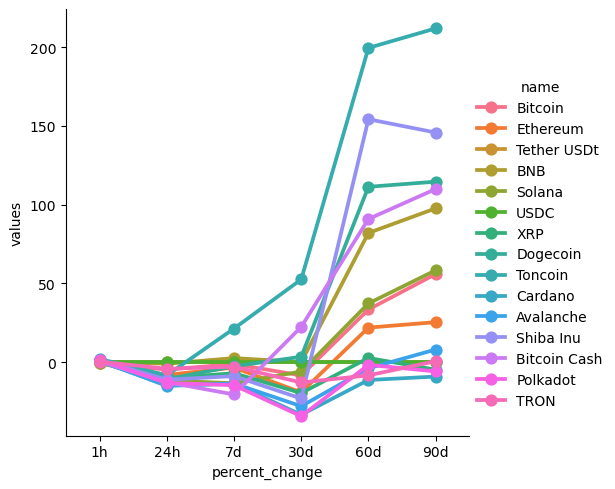

In [16]:
sns.catplot(x='percent_change',y='values',hue='name', data=df7, kind='point')

In [17]:
df9 =df[['name', 'quote.USD.price','Timestamp']]
df9 = df9.query("name =='Bitcoin'")
df9
    

,name,quote.USD.price,Timestamp
0,Bitcoin,66847.98726,NaT
15,Bitcoin,66847.98726,2024-04-12 17:24:40.592921
30,Bitcoin,66850.65785,2024-04-12 17:25:41.763177
45,Bitcoin,66955.60484,2024-04-12 17:26:43.018900
60,Bitcoin,66947.36752,2024-04-12 17:27:44.311251
75,Bitcoin,66905.55414,2024-04-12 17:28:45.612579
90,Bitcoin,66906.90805,2024-04-12 17:29:46.844338
105,Bitcoin,66930.10571,2024-04-12 17:30:48.247548
120,Bitcoin,66888.39724,2024-04-12 17:31:49.471328
135,Bitcoin,66793.22124,2024-04-12 17:32:50.786053


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

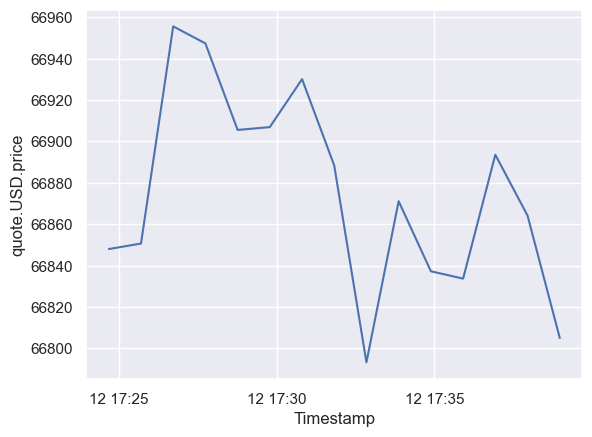

In [18]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df9)